*This notebook was written by Jiayi Zhu & Alex Glover.*

# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 




Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [30]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
url1 = 'https://raw.githubusercontent.com/fluffyjiayi/applied_ml_lab2/main/owid-covid-data%20(2).csv'
df_covid = pd.read_csv(url1)
df_covid.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [32]:
url2 = 'https://raw.githubusercontent.com/fluffyjiayi/applied_ml_lab2/main/Food_Supply_Quantity_kg_Data.csv'
df_food = pd.read_csv(url2)
df_food.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


**Brief Description of Datasets** <br>

The first datset we have selected (https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide) is a COVID-19 dataset containing many details on the pandemic collected from all around the world. The data begins roughly from the start of 2020 to January 2022. It contains basic metrics like total cases and total deaths as well as vaccination rates and prevalance of some health risks. <br>

The second dataset we have selected (https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_Quantity_kg_Data.csv) contains food supply quantity data for various types of food as a percentage of total food intake along with obesity and undernourishments rates and recent basic COVID-19 metrics for many countries. The intended use of the dataset is for us to learn about about how diet patterns impact COVID-19 infection and recovery rate. Some of the food types covered by the data includes alcoholic beverage, animal fats, seafood, and sugar. <br>

**Exploratory Questions**
1. Which variable (age, pre-existing health condition, unvaccinated, etc.)is most closely related to death rate?
2. Which food types seem to best prepare the body to fight and recover from COVID-19?
3. How does wealth and development of an area relate to infection rates?
4. What factors impact vaccination rate?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [33]:
# first we drop some columns from both datasets to make number of variables manageable


food_drops = ['Animal Products', 'Recovered', 'Vegetable Oils', 'Pulses', 'Starchy Roots', 'Eggs', 'Milk - Excluding Butter','Aquatic Products, Other', 'Cereals - Excluding Beer', 'Miscellaneous', 'Stimulants', 'Sugar Crops', 'Oilcrops', 'Vegetal Products', 'Active', 'Population', 'Unit (all except Population)', 'Spices']
df_food.drop(columns=food_drops, axis=1, inplace=True)

df_food.head()


,Country,Alcoholic Beverages,Animal fats,"Fish, Seafood",Fruits - Excluding Wine,Meat,Offals,Sugar & Sweeteners,Treenuts,Vegetables,Obesity,Undernourished,Confirmed,Deaths
0,Afghanistan,0.0014,0.1973,0.0350,5.3495,1.2020,0.2057,1.3489,0.0770,6.7642,4.5,29.8,0.142134,0.006186
1,Albania,1.6719,0.1357,0.2126,6.7861,1.8845,0.2324,1.5367,0.1515,11.7753,22.3,6.2,2.967301,0.050951
2,Algeria,0.2711,0.0282,0.2416,6.3801,1.1305,0.0870,1.8342,0.1152,11.6484,26.6,3.9,0.244897,0.006558
3,Angola,5.8087,0.0560,1.7707,6.0005,2.0571,0.1550,1.8495,0.0061,2.3041,6.8,25,0.061687,0.001461
4,Antigua and Barbuda,3.5764,0.0087,4.1489,10.7451,5.6888,0.2219,3.8749,0.0253,5.4495,19.1,NaN,0.293878,0.007143


In [34]:
covid_drops = ['continent', 'life_expectancy', 'hosp_patients_per_million', 'positive_rate',
               'icu_patients_per_million', 'human_development_index', 'people_fully_vaccinated',
               'median_age', 'iso_code', 'total_vaccinations', 'total_cases', 'total_deaths',
               'icu_patients', 'hosp_patients', 'total_tests', 'new_vaccinations_smoothed_per_million',
               'new_cases', 'new_cases_smoothed', 'new_cases_per_million', 'new_cases_smoothed_per_million',
               'new_deaths', 'new_deaths_smoothed', 'new_deaths_per_million', 'new_deaths_smoothed_per_million',
               'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute',
               'total_tests_per_thousand',
               'excess_mortality_cumulative_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
               'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'stringency_index', 'reproduction_rate', 'new_tests',
               'new_tests_smoothed', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'new_vaccinations',
               'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'new_people_vaccinated_smoothed',
               'new_people_vaccinated_smoothed_per_hundred', 'aged_70_older', 'hospital_beds_per_thousand', 'handwashing_facilities',
               'male_smokers', 'female_smokers', 'extreme_poverty', 'total_boosters_per_hundred', 'people_fully_vaccinated_per_hundred',
               'people_vaccinated_per_hundred', 'total_boosters', 'tests_units']
df_covid.drop(columns=covid_drops, axis=1, inplace=True)

df_covid.head()

,location,date,total_cases_per_million,total_deaths_per_million,people_vaccinated,population,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
0,Afghanistan,2020-02-24,0.126,NaN,NaN,39835428.0,54.422,2.581,1803.987,597.029,9.59
1,Afghanistan,2020-02-25,0.126,NaN,NaN,39835428.0,54.422,2.581,1803.987,597.029,9.59
2,Afghanistan,2020-02-26,0.126,NaN,NaN,39835428.0,54.422,2.581,1803.987,597.029,9.59
3,Afghanistan,2020-02-27,0.126,NaN,NaN,39835428.0,54.422,2.581,1803.987,597.029,9.59
4,Afghanistan,2020-02-28,0.126,NaN,NaN,39835428.0,54.422,2.581,1803.987,597.029,9.59


### Inspection of COVID19 Dataset 

In [35]:
print("Shape of dataset::{}".format(df_covid.shape))
df_covid.dtypes

Shape of dataset::(153172, 11)


location                     object
date                         object
total_cases_per_million     float64
total_deaths_per_million    float64
people_vaccinated           float64
population                  float64
population_density          float64
aged_65_older               float64
gdp_per_capita              float64
cardiovasc_death_rate       float64
diabetes_prevalence         float64
dtype: object

In [36]:
print('Start date: ', df_covid['date'].min())
print('End date: ', df_covid['date'].max())


Start date:  2020-01-01
End date:  2022-01-08


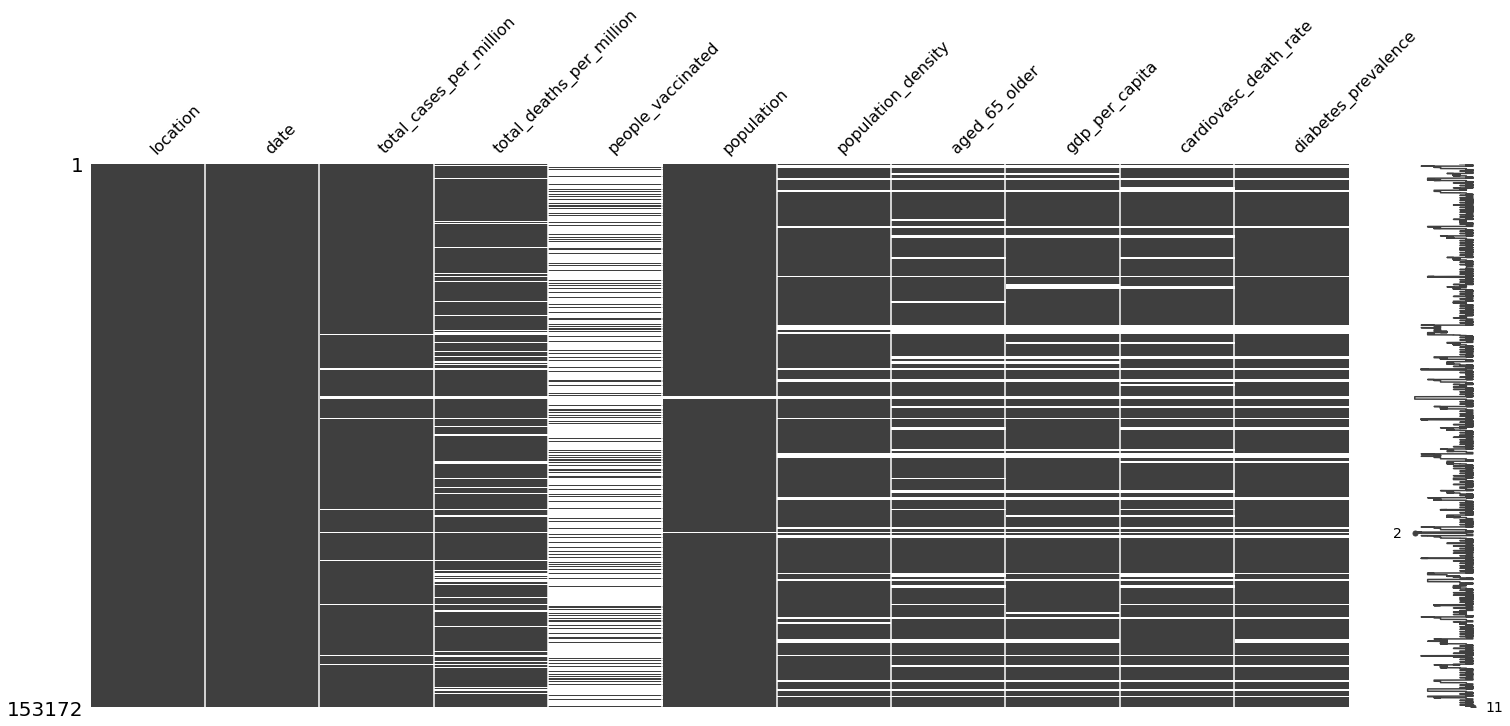

In [37]:
msno.matrix(df_covid)

The COVID19 dataset has 153,172 instances and 11 variables (after cleaning). The instances are unique in that they are spread over multiple countries over multiple dates. All of the data in this dataset is numerical (counts, rates, index values, etc.) except for ***location*** and ***date***. ***location*** and ***date*** are categorical features since there is a limited number of countries and a limited window of time (possible dates) that the data was collected on. the variable ***location*** is not ordinal but date is since there is an order to the possible date values that adds meaning to the data. 

This dataset has time boundaries set by the ***date*** variable. The time frame for this data spans for January 1, 2020 to January 8, 2022. 

This dataset has missing values in all columns except for the ***location*** and ***date*** columns. The column where missing values are most prevelant is ***people_vaccinated***. This is a column where over 50% of the data is missing. 

### Inspection of Food Dataset

In [38]:
print("Shape of dataset::{}".format(df_food.shape))
df_food.dtypes

Shape of dataset::(170, 14)


Country                     object
Alcoholic Beverages        float64
Animal fats                float64
Fish, Seafood              float64
Fruits - Excluding Wine    float64
Meat                       float64
Offals                     float64
Sugar & Sweeteners         float64
Treenuts                   float64
Vegetables                 float64
Obesity                    float64
Undernourished              object
Confirmed                  float64
Deaths                     float64
dtype: object

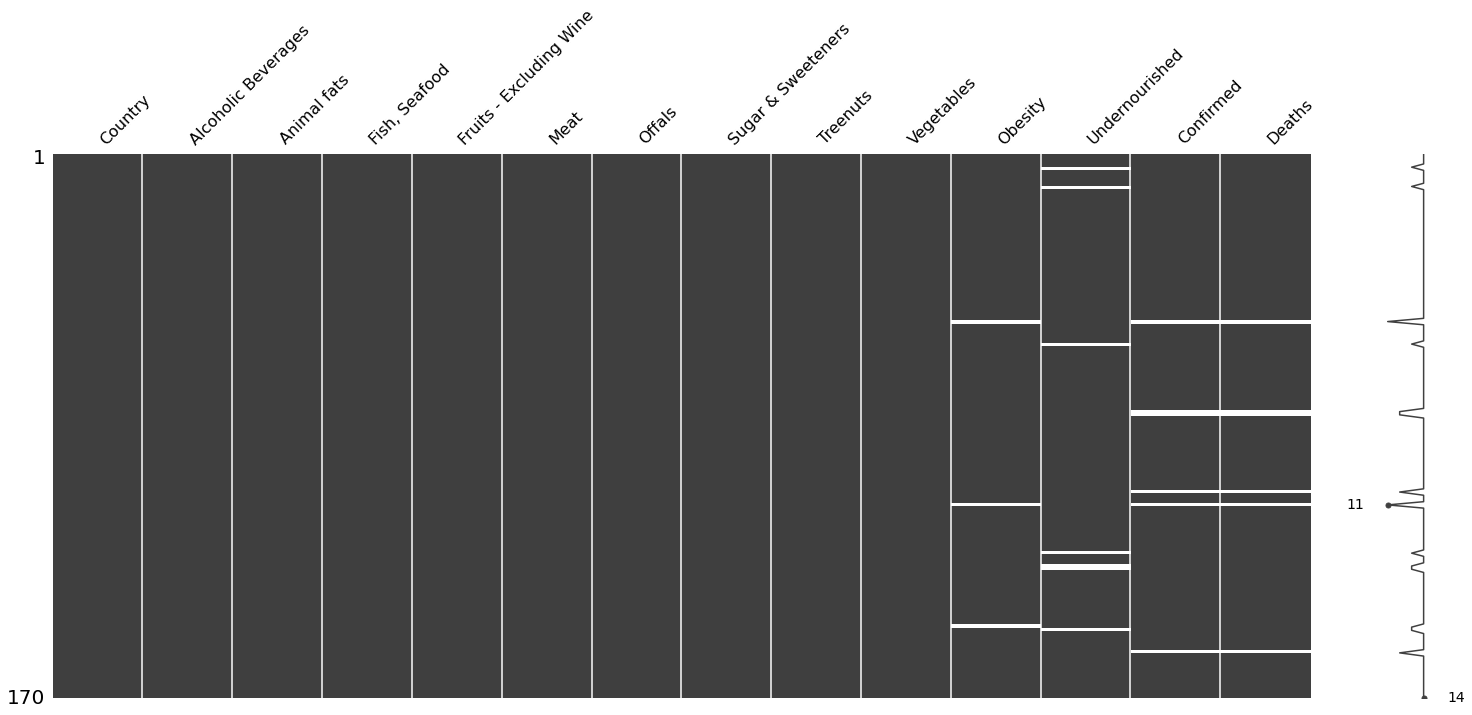

In [39]:
msno.matrix(df_food)

The Food dataset has 170 instances and 14 variables (after cleaning). The instances are uniquely identified by the ***Country*** variable, a non-ordinal categorical variable. All of the other variables in this dataset are numerical (specifically percentages). This dataset does not have time boundaries.

This datset has a small percentage of missing values in the **Obesity**,  **Undernourished**, **Confirmed**, and **Deaths** columns. 

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### **COVID Dictionary**
#### Categorical Variables

<table>
  <tr>
    <td>Variable Name</td>
    <td>Description</td>
    <td>Levels</td>
  </tr>
  <tr>
    <td>location</td>
    <td>Name of the country where the specific row of data was collected</td>
    <td>There are 238 possible unique values in this column. Complete list of unique values is listed below.</td>
  </tr>
  <tr>
    <td>date</td>
    <td>Date of observation. For each country there are many days of data.</td>
    <td>There are 739 possible unique values in this column. Complete list of unique values is listed below.</td>
</table>

#### Numerical Variables

<table>
  <tr>
    <td>Variable Name</td>
    <td>Description</td>
    <td>Minimum</td>
    <td>Maximum</td>
    <td>Median</td>
  </tr>
  <tr>
    <td>total_cases_per_million</td>
    <td>Total confirmed cases of COVID-19 per 1,000,000 people </td>
    <td>0.001000</td>
    <td>341391.525000</td>
    <td>4015.258000</td>
  </tr>
  <tr>
    <td>total_deaths_per_million</td>
    <td>Total deaths attributed to COVID-19 per 1,000,000 people
 </td>
    <td>0.000000	</td>
    <td>6085.808000</td>
    <td>106.136000</td>
  </tr>
  <tr>
    <td>total_tests_per_thousand</td>
    <td>Total tests for COVID-19 per 1,000 people</td>
    <td>0.000000</td>
    <td>22351.573000</td>
    <td>145.714000</td>
  </tr>
  <tr>
    <td>people_vaccinated</td>
    <td>Total number of people who received at least one vaccine dose</td>
    <td>0.000000e+00</td>
    <td>4.655633e+09</td>
    <td>2.340164e+06</td>
  </tr>
  <tr>
    <td>population</td>
    <td>Latest available values of population</td>
    <td>4.700000e+01</td>
    <td>7.874966e+09</td>
    <td>8.715494e+06</td>
  </tr>
  <tr>
    <td>population_density</td>
    <td>Number of people divided by land area, measured in square kilometers, most recent year available</td>
    <td>0.137000</td>
    <td>20546.766000</td>
    <td>85.129000</td>
  </tr>  
  <tr>
    <td>aged_65_older</td>
    <td>Share of the population that is 65 years and older, most recent year available</td>
    <td>1.144000</td>
    <td>27.049000</td>
    <td>6.614000</td>
  </tr>
  <tr>
    <td>gdp_per_capita</td>
    <td>Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available</td>
    <td>661.240000</td>
    <td>116935.600000</td>
    <td>12951.839000</td>
  </tr>
  <tr>
    <td>cardiovasc_death_rate</td>
    <td>Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)</td>
    <td>79.370000</td>
    <td>724.417000</td>
    <td>242.648000</td>
  </tr>
  <tr>
    <td>diabetes_prevalence</td>
    <td>Diabetes prevalence (% of population aged 20 to 79) in 2017</td>
    <td>0.990000</td>
    <td>30.530000</td>
    <td>7.170000</td>
  </tr>
</table>

*Other univariate stats listed below.*

In [40]:
print('Number of unique values in location ', df_covid['location'].nunique())
df_covid['location'].unique()

Number of unique values in location  238


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [41]:
print('Number of unique values in date ', df_covid['date'].nunique())
df_covid['date'].unique()

Number of unique values in date  739


array(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-

In [42]:
df_covid.describe()

,total_cases_per_million,total_deaths_per_million,people_vaccinated,population,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
count,149820.000000,132590.000000,3.776700e+04,1.521530e+05,136343.000000,125852.000000,127647.000000,126237.000000,132708.000000
mean,23484.220297,457.823964,7.396784e+07,1.484492e+08,465.053029,8.772927,19684.866965,259.842125,8.184754
std,38303.228732,723.013956,3.453324e+08,7.080073e+08,2149.098562,6.149813,20668.391843,119.821195,4.458695
min,0.001000,0.000000,0.000000e+00,4.700000e+01,0.137000,1.144000,661.240000,79.370000,0.990000
25%,514.036750,15.829000,3.318545e+05,1.273428e+06,36.253000,3.507000,4466.507000,168.711000,5.310000
50%,4015.258000,106.136000,2.340164e+06,8.715494e+06,85.129000,6.614000,12951.839000,242.648000,7.170000
75%,30741.449500,623.797000,1.397515e+07,3.393361e+07,212.865000,14.178000,27936.896000,329.942000,10.430000
max,341391.525000,6085.808000,4.655633e+09,7.874966e+09,20546.766000,27.049000,116935.600000,724.417000,30.530000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe89b25ed0>,
      dtype=object)

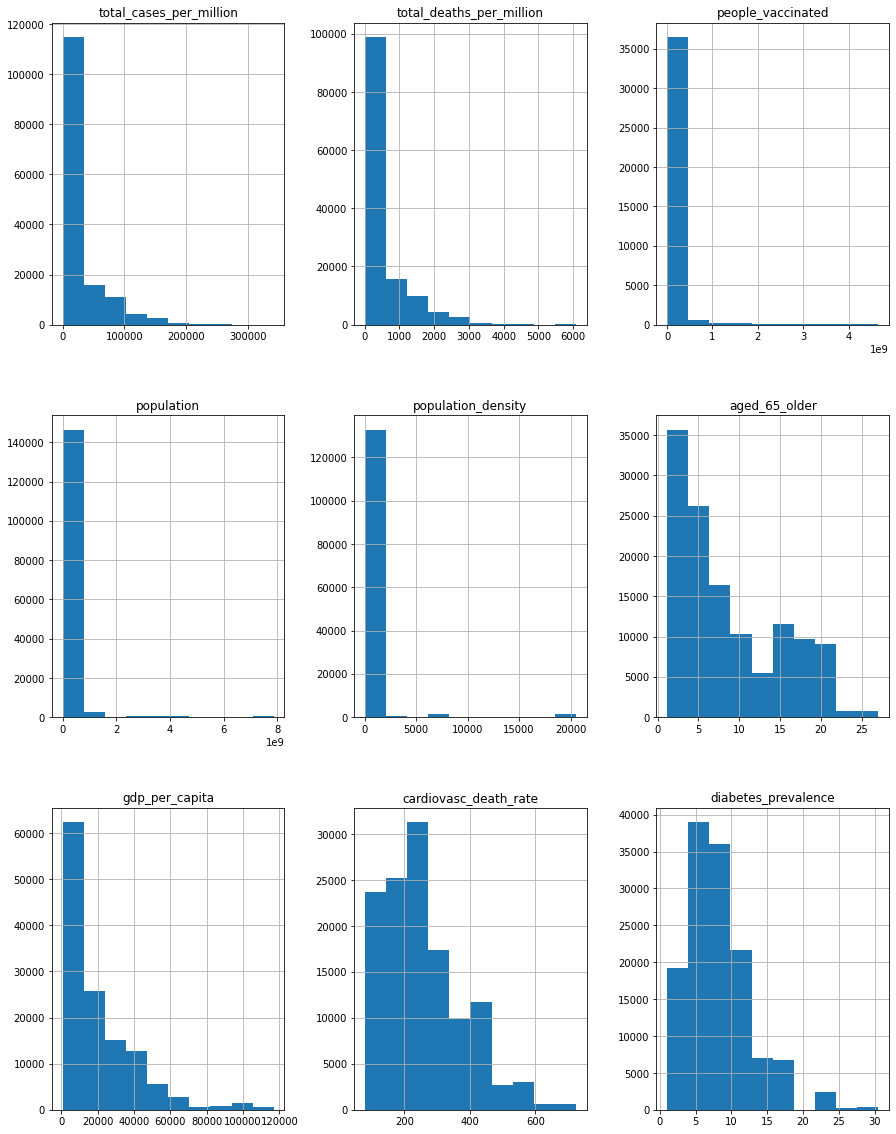

In [43]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_covid.hist(ax = ax)

### **Food Dictionary**
#### Categorical Variables

<table>
  <tr>
    <td>Variable Name</td>
    <td>Description</td>
    <td>Levels</td>
  </tr>
  <tr>
    <td>Country</td>
    <td>Geographic location of the data. This is the unique row identifier of this dataset.</td>
    <td>There are 170 different values in this column. Complete list of unique values is listed below.</td>
  </tr>
</table>

#### Numerical Variables

<table>
  <tr>
    <td>Variable Name</td>
    <td>Description</td>
    <td>Minimum</td>
    <td>Maximum</td>
    <td>Median</td>
  </tr>
  <tr>
    <td>Alcoholic Beverages</td>
    <td>Amount of alcoholic beverage (beer, wine, etc.) intake as a percentage of total food intake (kg) </td>
    <td>0.000000</td>
    <td>15.370600</td>
    <td>2.866150</td>
  </tr>
  <tr>
    <td>Animal fats</td>
    <td>Amount of animal fat intake as a percentage of total food intake </td>
    <td>0.001000</td>
    <td>1.355900</td>
    <td>0.116850</td>
  </tr>
  <tr>
    <td>Fish, Seafood</td>
    <td>Amount of seafood intake as a percentage of total food intake</td>
    <td>0.034200</td>
    <td>8.795900</td>
    <td>1.029250</td>
  </tr>
  <tr>
    <td>Fruits - Exluding Wine</td>
    <td>Amount of fruit intake as a percentage of total food intake</td>
    <td>0.659600</td>
    <td>19.302800</td>
    <td>5.021250</td>
  </tr>
  <tr>
    <td>Meat</td>
    <td>Amount of meat intake as a percentage of total food intake</td>
    <td>0.356000</td>
    <td>8.170000</td>
    <td>3.424750</td>
  </tr>
  <tr>
    <td>Offals</td>
    <td>Amount of offals (internal organs of animals like liver, stomach, etc.) intake as a percentage of total food intake</td>
    <td>0.000000</td>
    <td>1.225600</td>
    <td>0.166800</td>
  </tr>  
  <tr>
    <td>Sugar & Sweeteners</td>
    <td>Amount of sugar intake as a percentage of total food intake</td>
    <td>0.366600</td>
    <td>9.725900</td>
    <td>2.601650</td>
  </tr>
  <tr>
    <td>Treenuts</td>
    <td>Amount of nut intake as a percentage of total food intake</td>
    <td>0.000000</td>
    <td>0.756900</td>
    <td>0.079950</td>
  </tr>
  <tr>
    <td>Vegetables</td>
    <td>Amount of vegetable intake as a percentage of total food intake</td>
    <td>0.857000</td>
    <td>19.299500</td>
    <td>5.028100</td>
  </tr>
  <tr>
    <td>Obesity</td>
    <td>Obesity prevalance in the country as a percentage of population</td>
    <td>2.100000</td>
    <td>45.600000</td>
    <td>21.200000</td>
  </tr>
  <tr>
    <td>Confirmed</td>
    <td>Percentage of confirmed COVID-19 cases</td>
    <td>0.000312</td>
    <td>10.408199</td>
    <td>1.011570</td>
  </tr>
  <tr>
    <td>Deaths</td>
    <td>Percentage of COVID-19 deaths</td>
    <td>0.000000</td>
    <td>0.185428</td>
    <td>0.011998</td>
  </tr>
</table>

*Other univariate stats listed below.*

In [44]:
print('Number of unique values in Country ', df_food['Country'].nunique())
df_food['Country'].unique()

Number of unique values in Country  170


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq

In [45]:
df_food.describe()

,Alcoholic Beverages,Animal fats,"Fish, Seafood",Fruits - Excluding Wine,Meat,Offals,Sugar & Sweeteners,Treenuts,Vegetables,Obesity,Confirmed,Deaths
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000
mean,3.022971,0.221064,1.387195,5.621405,3.375934,0.193435,2.799115,0.117474,6.085912,18.707784,2.021972,0.039370
std,2.382243,0.278304,1.257382,3.152849,1.762911,0.159634,1.545951,0.146143,3.560148,9.633557,2.360454,0.048718
min,0.000000,0.001000,0.034200,0.659600,0.356000,0.000000,0.366600,0.000000,0.857000,2.100000,0.000312,0.000000
25%,0.895625,0.040225,0.557100,3.541950,1.891475,0.105050,1.721025,0.020750,3.616500,8.500000,0.140976,0.002013
50%,2.866150,0.116850,1.029250,5.021250,3.424750,0.166800,2.601650,0.079950,5.028100,21.200000,1.011570,0.011998
75%,4.710950,0.253900,1.821275,6.827750,4.422450,0.228575,3.782150,0.148650,7.801650,25.700000,3.487069,0.069503
max,15.370600,1.355900,8.795900,19.302800,8.170000,1.225600,9.725900,0.756900,19.299500,45.600000,10.408199,0.185428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe897ac810>,
      dtype=object)

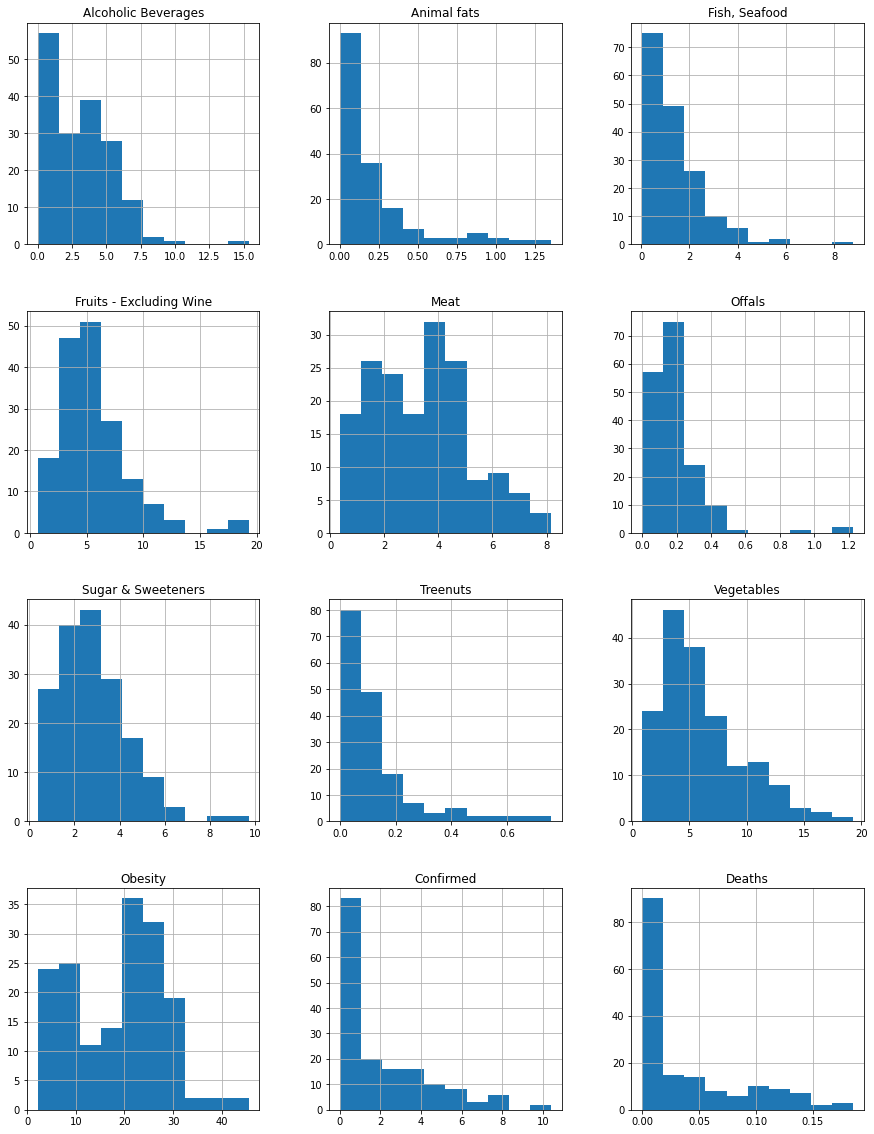

In [46]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_food.hist(ax = ax)

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [47]:
df_food = df_food.rename(columns={'Country' : 'location'})
print(df_food.info())
(df_food['Undernourished'] == '<2.5').sum()

df_food = df_food.replace({'Undernourished': '<2.5'}, '2.5')
df_food['Undernourished']= df_food['Undernourished'].astype('float')
df_food['Undernourished'].fillna(df_food['Undernourished'].mean(), inplace=True)

#merging the data and filling the na values with the mean instead. 
df_food.fillna(df_food.isna().mean(), inplace=True)
df_food['Undernourished'] = pd.cut(df_food['Undernourished'], bins=6)
df_food['Undernourished'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 170 non-null    object 
 1   Alcoholic Beverages      170 non-null    float64
 2   Animal fats              170 non-null    float64
 3   Fish, Seafood            170 non-null    float64
 4   Fruits - Excluding Wine  170 non-null    float64
 5   Meat                     170 non-null    float64
 6   Offals                   170 non-null    float64
 7   Sugar & Sweeteners       170 non-null    float64
 8   Treenuts                 170 non-null    float64
 9   Vegetables               170 non-null    float64
 10  Obesity                  167 non-null    float64
 11  Undernourished           163 non-null    object 
 12  Confirmed                164 non-null    float64
 13  Deaths                   164 non-null    float64
dtypes: float64(12), object(2)


[(21.533, 31.05], (2.443, 12.017], (12.017, 21.533], (50.083, 59.6], (31.05, 40.567], (40.567, 50.083]]
Categories (6, interval[float64, right]): [(2.443, 12.017] < (12.017, 21.533] < (21.533, 31.05] <
                                           (31.05, 40.567] < (40.567, 50.083] < (50.083, 59.6]]

The below code block removed rows with more than 6 NAs, and then imputed the remaining with the mean. This will help with the linear regression model at the end. The below block of code also grouped the df_covid dataset by location/country so that we did not have repeated values per country. 



In [48]:
# code here
df_grouped_by_country = df_covid.groupby('location').max()
print(df_grouped_by_country.shape)
df_grouped_by_country

found = df_grouped_by_country.isna().sum(axis=1) > 6
df_filtered = df_grouped_by_country.drop(df_grouped_by_country[found].index)
df_filtered.fillna(df_filtered.mean(), inplace=True)

df_filtered.isna().sum()
#All of the above statements rid of all NA values in the dataset. 

(238, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


date                        0
total_cases_per_million     0
total_deaths_per_million    0
people_vaccinated           0
population                  0
population_density          0
aged_65_older               0
gdp_per_capita              0
cardiovasc_death_rate       0
diabetes_prevalence         0
dtype: int64

In [49]:
#this will check to make sure that both datasets have properly merged.
#_merge value both shows that this is from both datasets

print(df_filtered.merge(df_food, how='inner', on='location', indicator=True))
df = df_filtered.merge(df_food, how='inner', on='location')
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isna().sum()

df.info()


                location        date  total_cases_per_million  \
0            Afghanistan  2022-01-08                 3974.076   
1                Albania  2022-01-08                74803.320   
2                Algeria  2022-01-08                 4969.941   
3                 Angola  2022-01-08                 2630.165   
4    Antigua and Barbuda  2022-01-08                49064.095   
..                   ...         ...                      ...   
153              Vanuatu  2022-01-08                   22.260   
154              Vietnam  2022-01-08                19113.949   
155                Yemen  2022-01-08                  333.807   
156               Zambia  2022-01-08                14881.936   
157             Zimbabwe  2022-01-08                14704.180   

     total_deaths_per_million  people_vaccinated  population  \
0                     184.986          4142857.0  39835428.0   
1                    1125.330          1160648.0   2872934.0   
2                     141.8

### Part 4 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

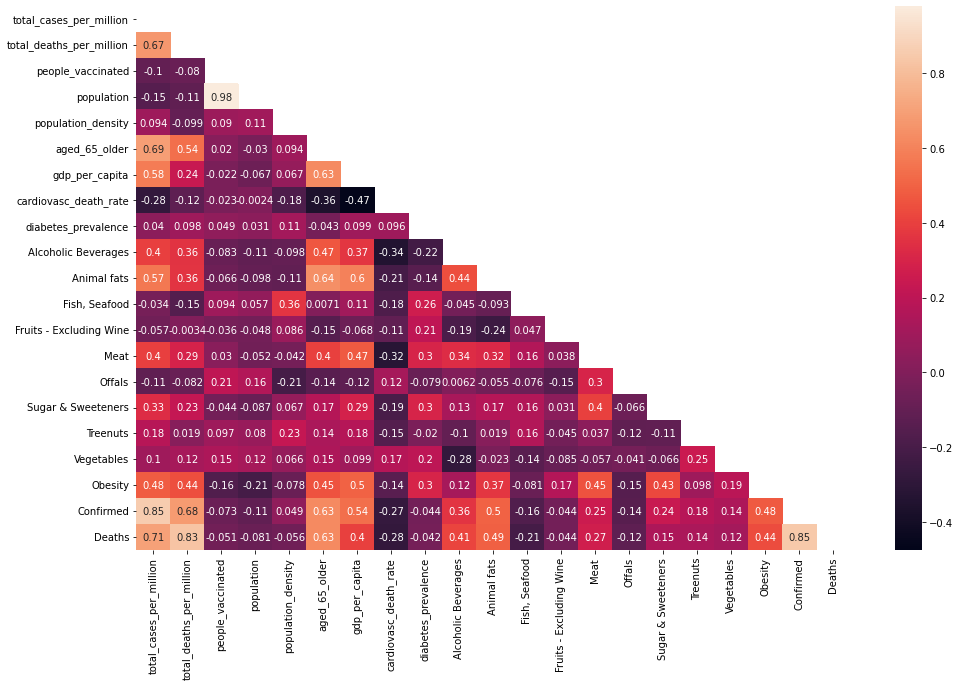

In [50]:
plt.figure(figsize=(16, 10))
# creating mask
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask)

df = df.drop(columns=['total_cases_per_million', 'total_deaths_per_million', 'Confirmed'])

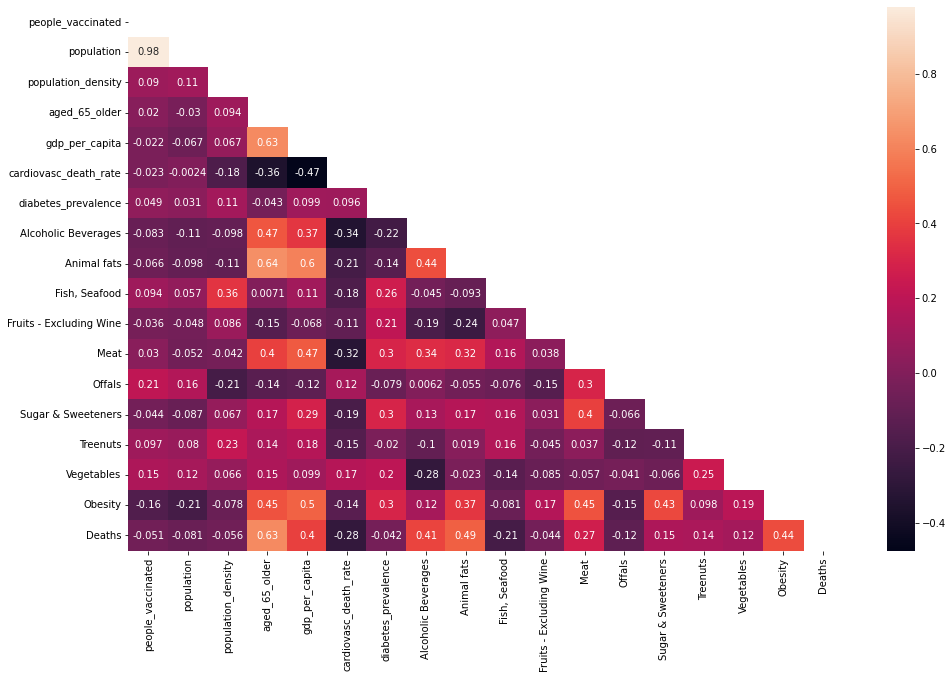

In [51]:
plt.figure(figsize=(16, 10))
# creating mask
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask)

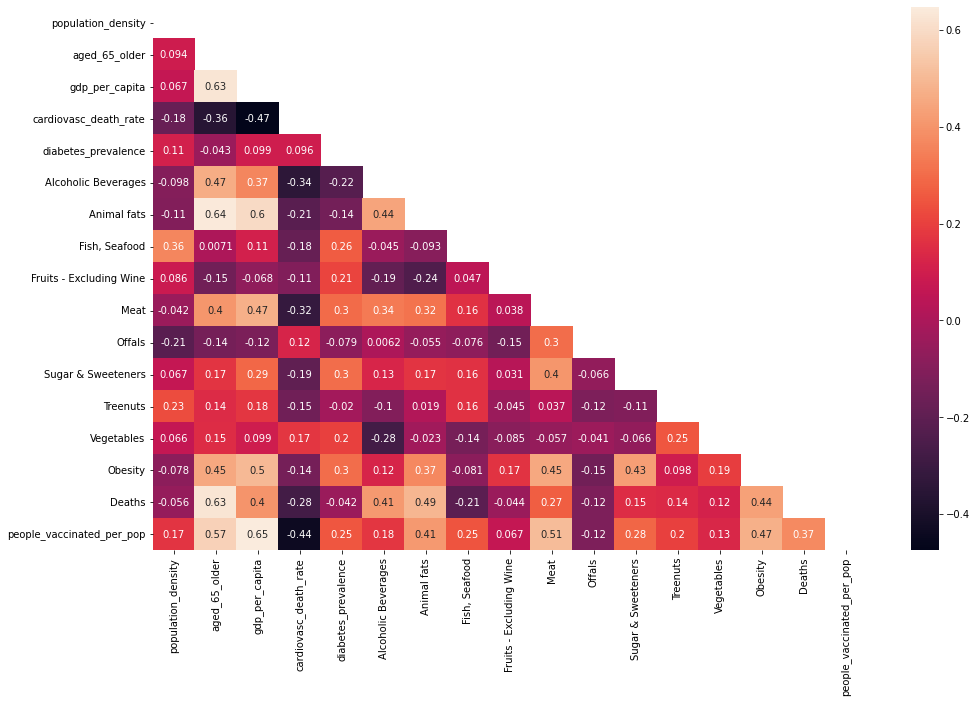

In [52]:
df['people_vaccinated_per_pop'] = df['people_vaccinated'] / df['population']
df = df.drop(columns=['people_vaccinated', 'population'])

plt.figure(figsize=(16, 10))
# creating mask
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask)

The above code shows the correlation between different features. I removed some of the features that were highly correlated so that we could only have features that would give us insight into new data. This will help smoothly transition into a linear regression model. 

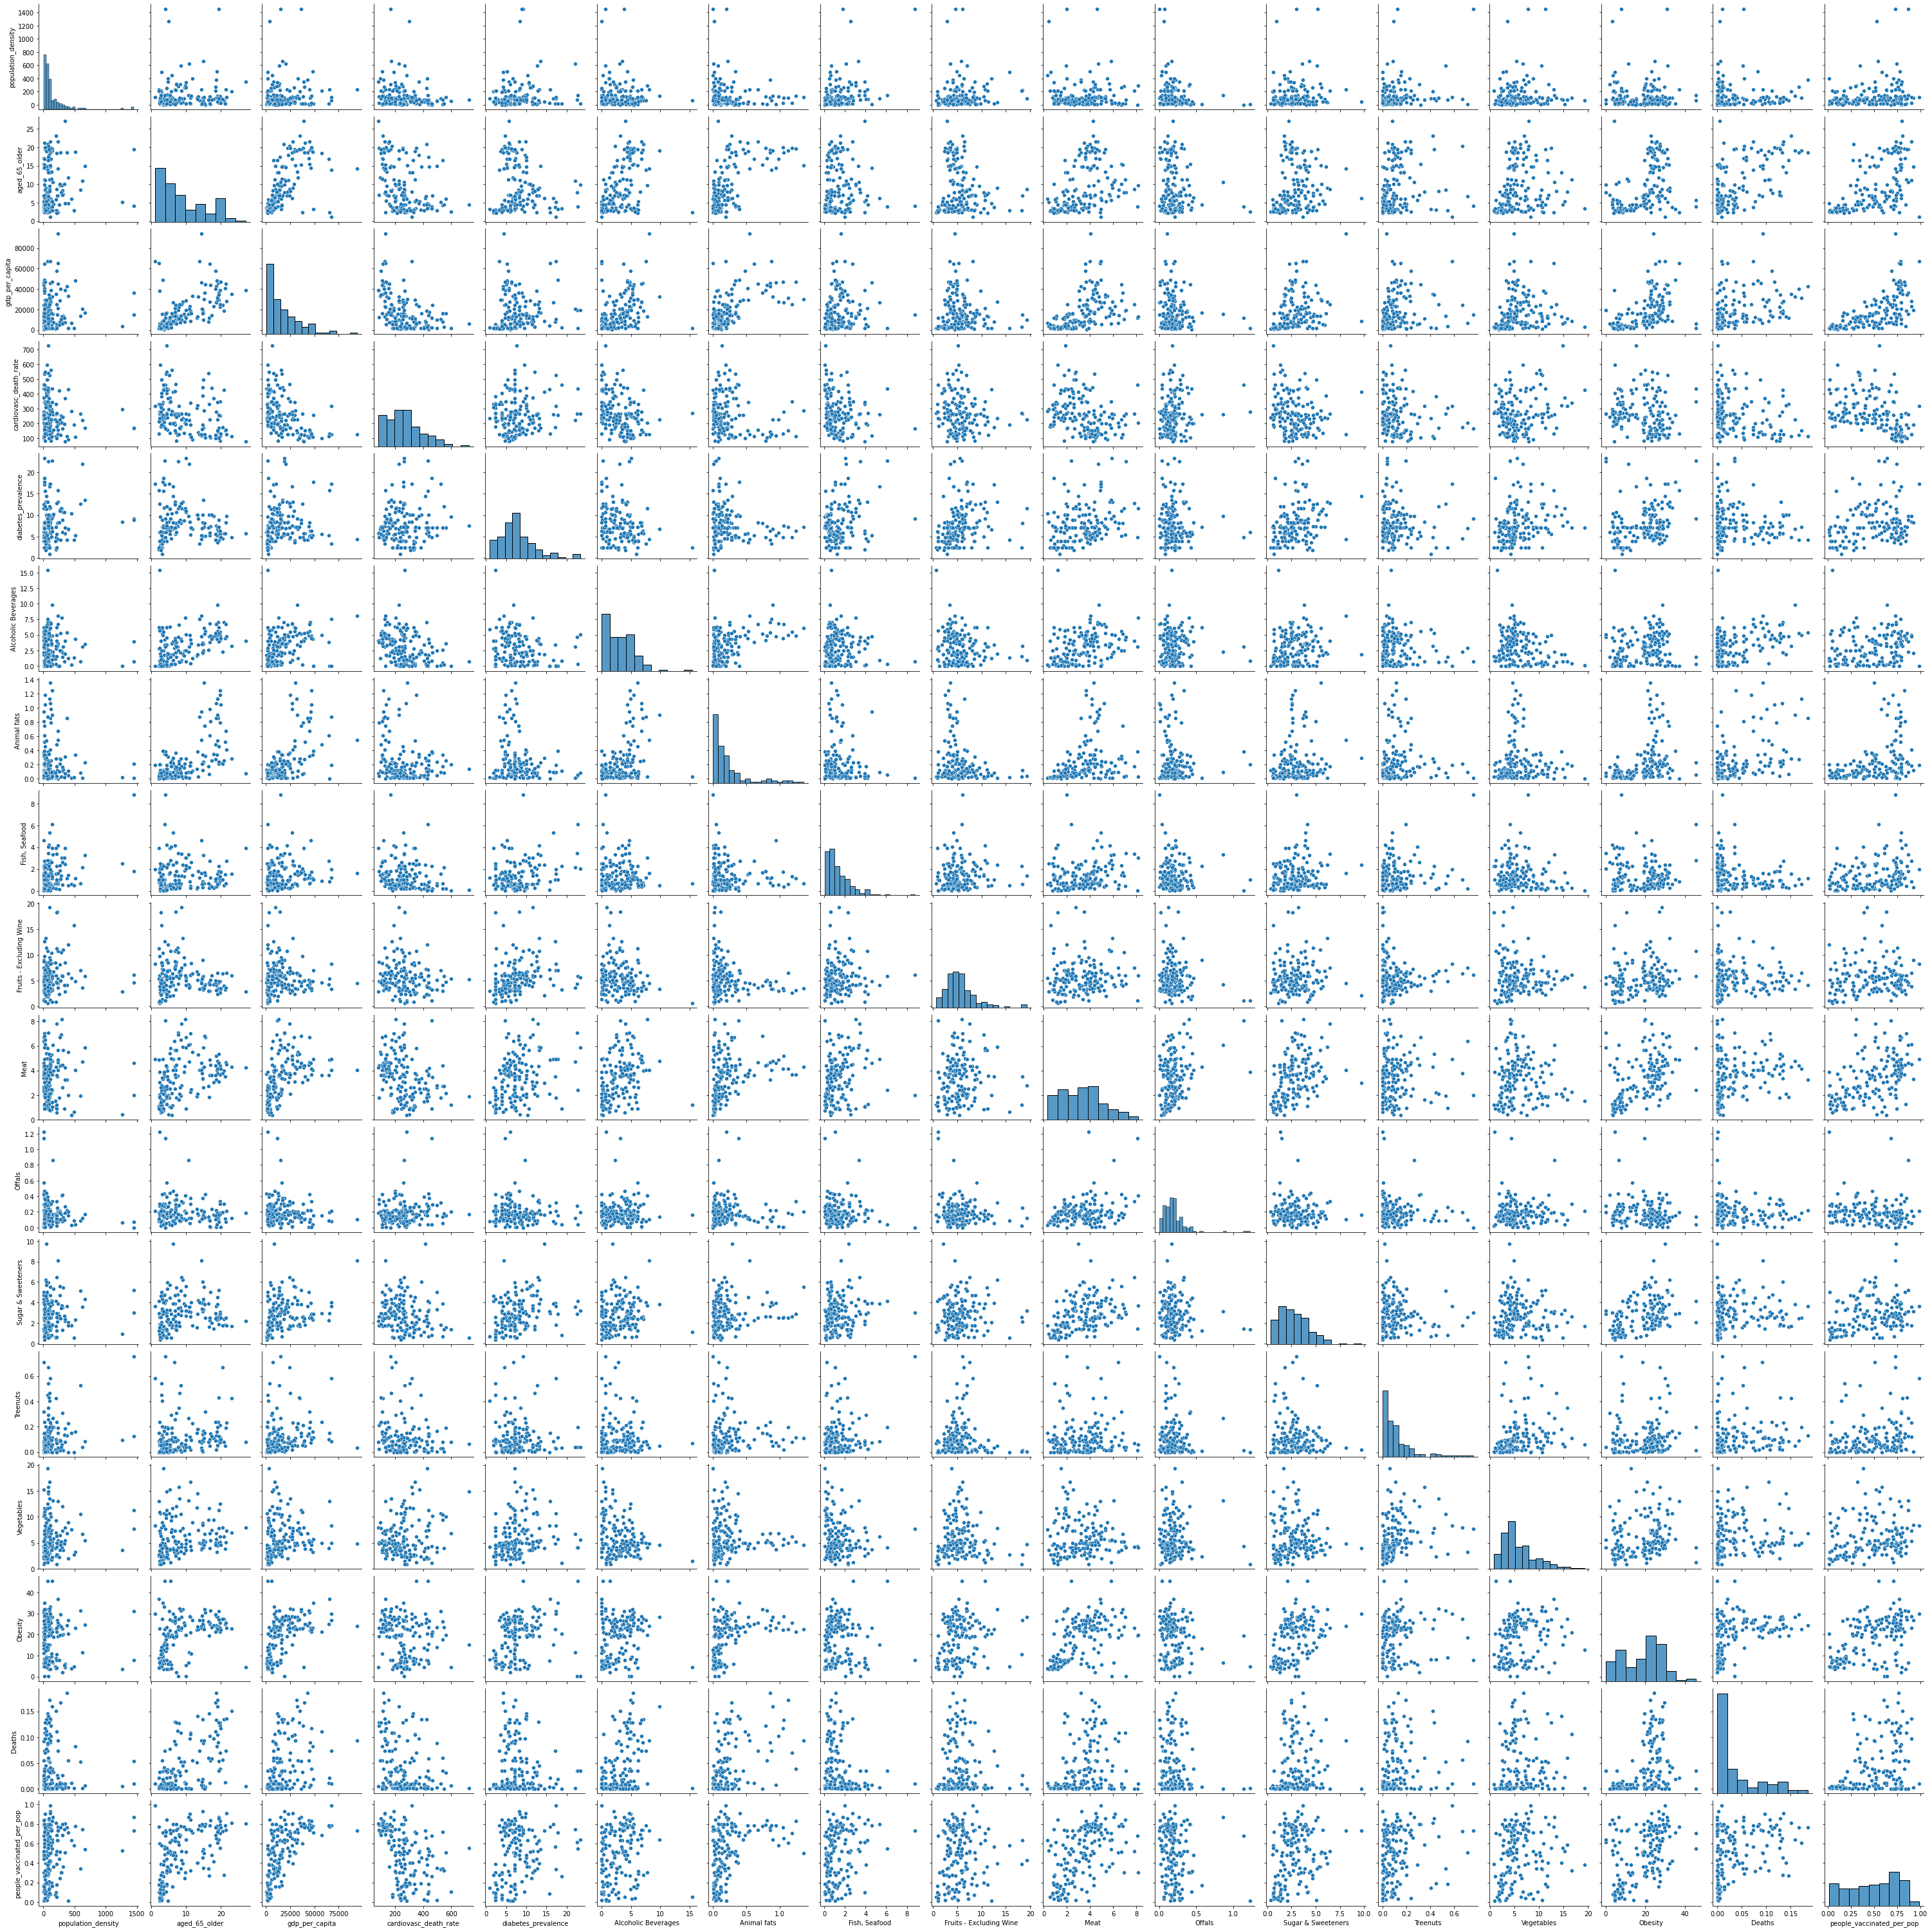

In [53]:
sns.pairplot(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   aged_65_older              158 non-null    float64 
 1   gdp_per_capita             158 non-null    float64 
 2   Alcoholic Beverages        158 non-null    float64 
 3   Animal fats                158 non-null    float64 
 4   Meat                       158 non-null    float64 
 5   Obesity                    158 non-null    float64 
 6   Undernourished             158 non-null    category
 7   Deaths                     158 non-null    float64 
 8   people_vaccinated_per_pop  158 non-null    float64 
dtypes: category(1), float64(8)
memory usage: 11.5 KB
None


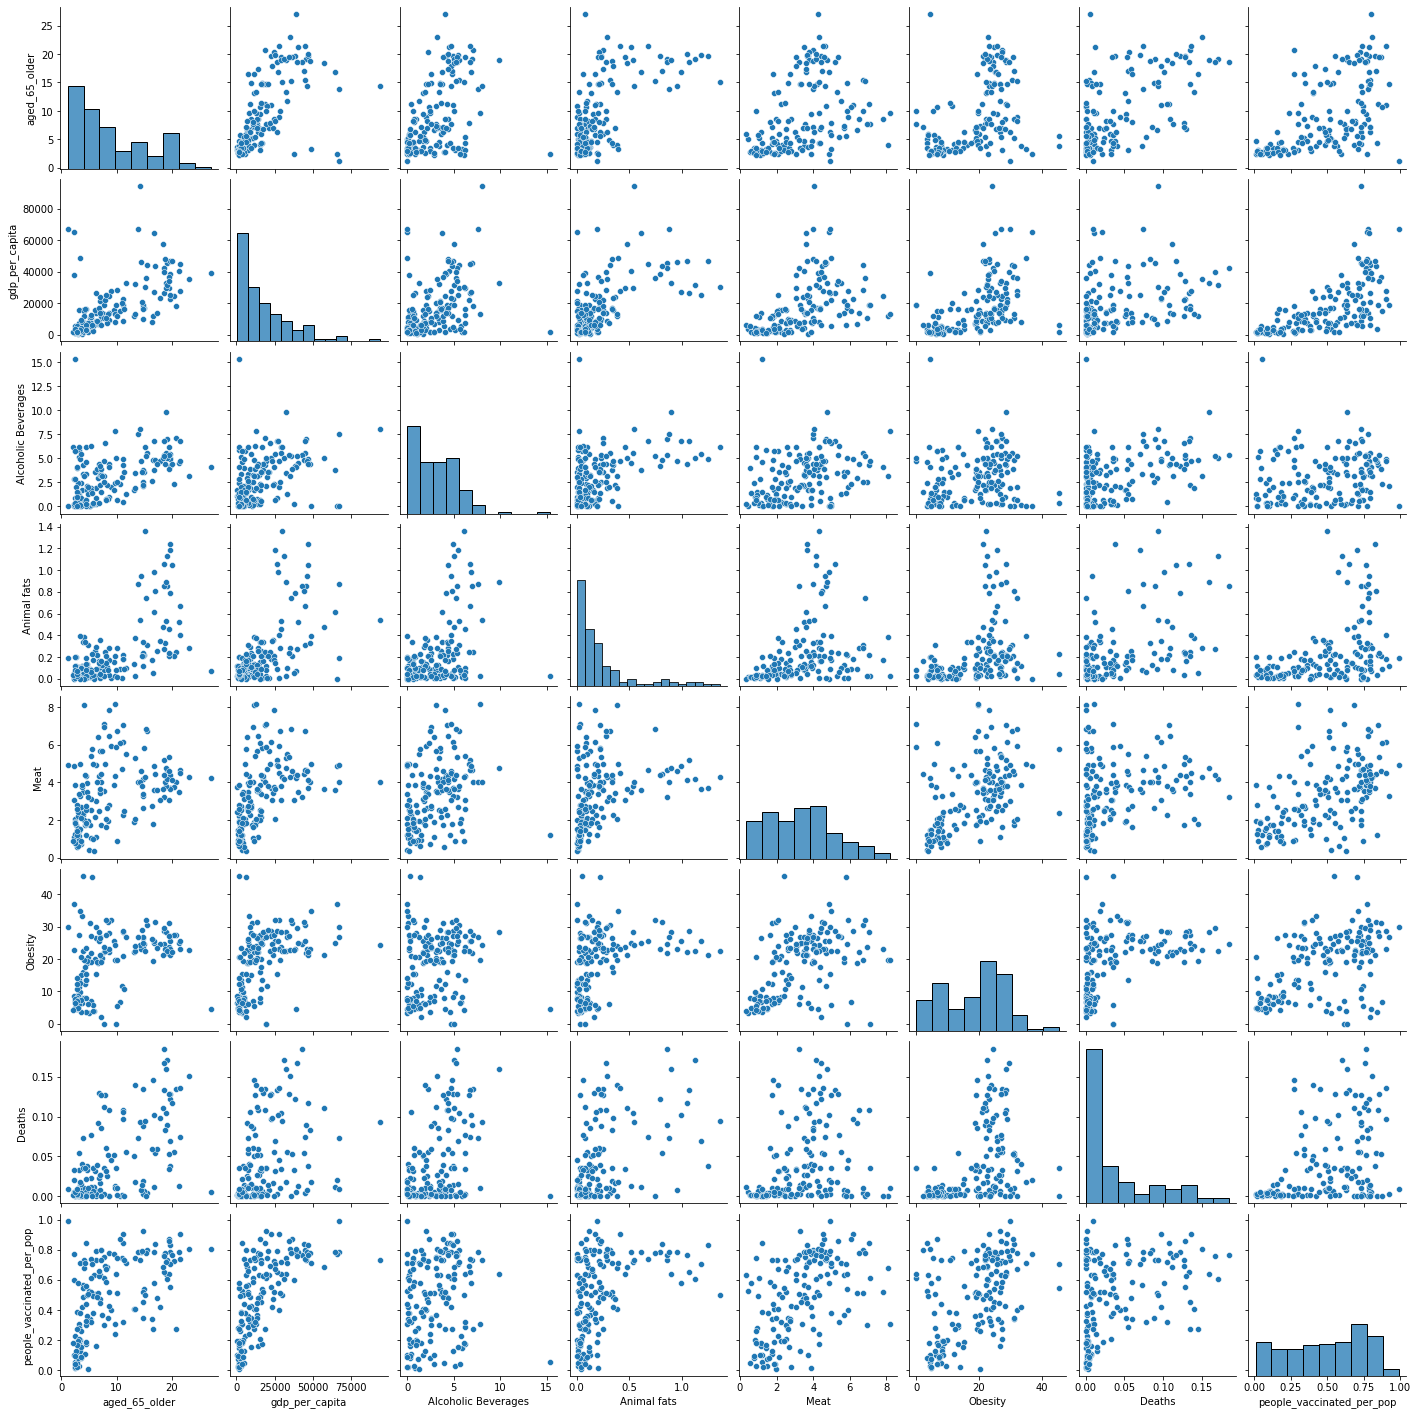

In [54]:
dfpair = df.drop(columns=['Offals', 'diabetes_prevalence', 'Treenuts' , 'Vegetables', 'cardiovasc_death_rate', 
                         'Fruits - Excluding Wine', 'population_density', 'Sugar & Sweeteners', 'Fish, Seafood', 'location', 'date'])

print(dfpair.info())
sns.pairplot(dfpair)



My predictor variables are :
-Aged_65_older , gdp_per_capita , Alcoholic Beverages, Animal fats, Obesity, people_vaccinated_per_pop, Meat, Undernourished

My target variable is:
-Deaths

I have chosen these variables because I have a preconceived thought that these variables will be the most correlated through the two datasets. 

Some of the predictor variables that are most strongly correlated are 
- Deaths & aged_65_older
- gdp_per_capita & people_vaccinated_per_pop
-gdp_per_capita & aged_65_older


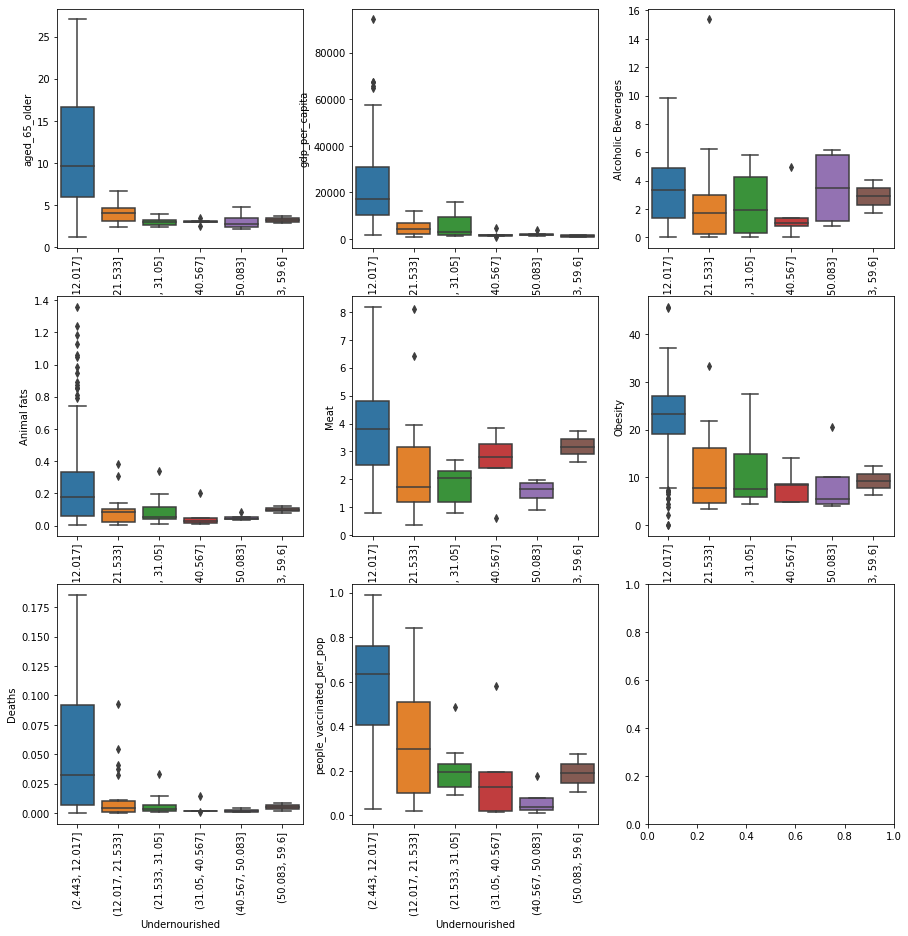

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

numerical_cols = list(dfpair.columns)
numerical_cols.remove('Undernourished')

for var, subplot in zip(numerical_cols, ax.flatten()):
  sns.boxplot(x = 'Undernourished', y = var, data = dfpair, ax=subplot)
  plt.setp(subplot.get_xticklabels(), rotation=90)

The above box plots show the relationship between my numerical predictors and the categorical predictor 'Undernourished'. One interesting relationship I gathered from this plot is that for the smallest percentage of undernourishment for aged_65_older (deaths of covid patients that were over 65), there was the most variety of deaths in this range. So this means, having a lower percentage of undernourishment of those covid patients aged 65 and older had no relationship to the deaths. Another interesting relationship I found is that as the percentage of undernourishment increased, the percentage of the population vaccinated decreased.

There are not any dichotomous variables.

In [56]:
import statsmodels.api as sm


X_df = df.drop(columns=['Deaths', 'location', 'date'])
dummy_vars = pd.get_dummies(df['Undernourished'], prefix='Undernourished', drop_first=True)
X_df = pd.concat([X_df.drop(columns='Undernourished'), dummy_vars], axis=1, join="inner")
y = df['Deaths'].to_numpy()


X = sm.add_constant(X_df)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     7.073
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.71e-13
Time:                        17:41:11   Log-Likelihood:                 314.10
No. Observations:                 158   AIC:                            -584.2
Df Residuals:                     136   BIC:                            -516.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The predictor variable that is most correlated with the target variable, “Deaths” are aged_65_older .

In [57]:
# code here


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = X_df[['aged_65_older', 'Fish, Seafood', 'Alcoholic Beverages', 'Treenuts', 'gdp_per_capita']].to_numpy()
y = df['Deaths'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


clf = LinearRegression().fit(X_train, y_train)

(105, 5) (105,)
(53, 5) (53,)


In [58]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


regression_results(y_test, clf.predict(X_test))

explained_variance:  0.3387
r2:  0.3219
MAE:  0.0307
MSE:  0.0015
RMSE:  0.0384
